In [14]:
import numpy as np
v = 2*np.pi ## MHz
yeta = 0.1
n = 10
t1 = 0.1
t2 = 0.05
t3 = 0.02
z = [-2*n, 3*n, -2*n, 2*n, -3*n, 2*n]
t = [-t1, -t2, -t3, t3, t2, t1]

In [15]:
c_c = 0
c_r = 0
theta = 0
N = len(z)
for i in range(N):
    c_c = c_c + z[i] * np.exp(-1j*v*t[i])
    c_r = c_r + z[i] * np.exp(-1j*np.sqrt(3)*v*t[i])

for i in range(N-1):
    for j in range(i-1):
        theta = theta + z[i]*z[j] * ( np.sin(v*(t[i]-t[j])) - np.sin(np.sqrt(3)*v*(t[i]-t[j]))/np.sqrt(3) )
theta = theta*yeta**2
print(c_c,c_r,theta)

-9.983719771774254j (1.7763568394002505e-15-13.009916388578455j) 0.6883949416275142


In [132]:
def dis(z_list,t_list):
    c_c = 0
    c_r = 0
    theta = 0
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    
    for i in range(N):
        c_c = c_c + z_list[i] * np.exp(-1j*v*T_list[i])
        c_r = c_r + z_list[i] * np.exp(-1j*np.sqrt(3)*v*T_list[i])

    for i in range(1,N-1):
        for j in range(i-1):
            theta = theta + z_list[i]*z_list[j] * ( np.sin(v*(T_list[i]-T_list[j])) - np.sin(np.sqrt(3)*v*(T_list[i]-T_list[j]))/np.sqrt(3) )
    theta = theta*yeta**2
    return abs(c_c), abs(c_r), theta, 1/12*(6+np.exp(-4*abs(c_c)**2)+np.exp(-4*abs(c_r)**2)+4*np.exp(-(abs(c_r)**2+abs(c_c)**2))*abs(np.sin(2*theta)))

In [85]:
dis(z,[0.1,0.2,0.3])


[-0.3, -0.2, -0.1, 0.1, 0.2, 0.3] [0.3, 0.2, 0.1] [0.1, 0.2, 0.3] [0.1, 0.2, 0.3, 0.3, 0.2, 0.1]


(4.4902797657958615,
 18.80825570349775,
 2.0862231242266267,
 0.5,
 [-0.3, -0.2, -0.1, 0.1, 0.2, 0.3])

In [22]:
from scipy.optimize import minimize

In [178]:
fun = lambda x: dis(z,x)[0]+ dis(z,x)[1] + abs(np.pi/4-dis(z,x)[2])*8.1

In [179]:
x0 = [0.1,0.2,0.3]
res = minimize(fun, x0, tol = 1e-7)
print(res.success)
print(res.x)
print(dis(z,res.x))

False
[0.04425826 0.12386611 0.14202583]
(5.052584684861472e-06, 2.4334388843527677e-05, 0.7853978975998457, 0.9999999995881588)


In [184]:
K = np.linspace(5,10,500)
f = np.zeros(500)
for i,k in enumerate(K):
    fun = lambda x: dis(z,x)[0]+ dis(z,x)[1] + abs(np.pi/4-dis(z,x)[2])*k
    x0 = [0.1,0.2,0.3]
    res = minimize(fun, x0, tol = 1e-7)
    print(res.x)
    print(dis(z,res.x))
    f[i] = dis(z,res.x)[3]


[0.05779573 0.12100499 0.11774317]
(0.17402526462368684, 3.793094265302276, 0.7814248681569766, 0.573826070672611)
[0.04658391 0.16861951 0.16961326]
(5.779007178735764, 2.9036769468859802e-06, 1.5991067962273249, 0.583333333330523)
[0.05482999 0.1231076  0.12570709]
(1.1142020834853383e-06, 3.2516904123101824, 0.8041463632532946, 0.5833418557890455)
[0.04732266 0.16951139 0.17306618]
(5.353420644201314, 2.119671687950131e-06, 1.6654145313496682, 0.583333333331858)
[0.04771496 0.16993304 0.17469134]
(5.148019335975505, 2.960161058496169e-06, 1.696416553993212, 0.5833333333306687)
[0.04450612 0.12453939 0.142025  ]
(0.12061456692540773, 2.4970361849341316e-06, 0.782587970320469, 0.9904697280520394)
[0.06739074 0.1832728  0.20008281]
(0.3192110507607495, 4.944301869847514, 2.834782412104006, 0.5554380316198327)
[0.04902593 0.17128139 0.17956912]
(4.534953239672248, 3.15319541499548e-06, 1.7905631729934537, 0.5833333334960474)
[0.04950601 0.17175744 0.18119331]
(4.3320638882377125, 2.7871

[0.0540146  0.15282276 0.17679326]
(1.0509348769005555e-07, 0.031404963312390066, 1.4546620316767096, 0.7429915141497953)
[0.04479706 0.12717049 0.1446996 ]
(0.33051327996893853, 0.21888321764425456, 0.8086646880244198, 0.9071842752968167)
[0.04477418 0.12412665 0.14144221]
(0.037519849195430055, 0.1542143100200306, 0.7840413351149773, 0.9836771788791651)
[0.04437847 0.12423001 0.14261839]
(0.02471273998166268, 1.7478366451939564e-06, 0.7953965064677521, 0.99952656258528)
[0.04427452 0.12386892 0.14200569]
(2.124741016018561e-06, 0.005668650409266007, 0.7853914275062241, 0.9999785784288768)
[0.04413315 0.12349888 0.14159236]
(1.8027882539684015e-05, 2.2537514468012887e-06, 0.778552446198154, 0.9999687577053518)
[0.05591365 0.15829175 0.18337771]
(1.2841772090155246e-07, 0.0003289406114888038, 1.6133248106898723, 0.6949847757960523)
[0.04425873 0.12386711 0.14202681]
(2.790350769998895e-06, 6.885781660770363e-05, 0.785415841683181, 0.9999999966255289)
[0.04475537 0.12537104 0.14382672]


[0.04425762 0.12386449 0.14202482]
(0.0001249755541046227, 1.1914694688641703e-06, 0.7853833661726962, 0.9999999894404891)
[0.05761838 0.11957109 0.11678857]
(2.4754389293946133e-07, 3.8522218447472234, 0.7709784527361062, 0.5833334529897357)
[0.05072722 0.09863169 0.09418733]
(2.810559756483144e-06, 2.43715898696761, 0.409905849683772, 0.5839748507055745)
[0.04425816 0.12386605 0.14202588]
(4.107893836646781e-06, 6.347663656924851e-06, 0.7853970591414121, 0.9999999999610752)
[0.04867342 0.12576383 0.13854635]
(8.740733328238548e-07, 1.3532421190654915, 0.8199699388414906, 0.6366642611098094)
[0.06157621 0.09373014 0.0753386 ]
(3.332941780342935e-06, 2.9582778542746233, 0.5514831094276753, 0.5833804118301595)
[0.04260467 0.11924635 0.13746132]
(0.12496477654600824, 2.5943789125904004e-06, 0.7190389284774811, 0.9869029102655147)
[0.05918234 0.11770103 0.11210866]
(4.930872279373943e-07, 4.086228293033965, 0.7613344456430191, 0.5833333519904743)
[0.04426017 0.12387067 0.14202729]
(0.0005

[0.0441005  0.1234023  0.14147172]
(0.0010181299083349415, 1.3397705060924636e-06, 0.776629608248469, 0.9999480519345876)
[0.04414888 0.12354772 0.1416515 ]
(2.0948418821831183e-07, 0.0003338485468731278, 0.7794662074023201, 0.9999764672398969)
[0.04318217 0.12066289 0.14001076]
(0.28780768908768906, 0.049534187049548706, 0.7646621098329932, 0.9481697047357851)
[0.03909361 0.1101647  0.12659048]
(0.0009605588743628601, 0.1329747439345077, 0.5596671154792427, 0.9556553812552178)
[0.03916796 0.11167624 0.13081238]
(0.31282931834635974, 0.14337567145882701, 0.6287445996288191, 0.9147883205218004)
[0.04145726 0.11639487 0.13529146]
(0.28312015747366104, 2.149294839881577e-06, 0.6931852104609295, 0.9462475484088394)
[0.04427621 0.12383983 0.14195359]
(1.3858523182364024e-06, 0.009937099498639412, 0.7848031815911112, 0.9999339415135792)
[0.04501092 0.12601512 0.14245327]
(0.32399582984511, 7.349314188331846e-07, 0.7853832968399802, 0.9382092712356612)
[0.0442583  0.12386633 0.14202606]
(9.59

[0.04426288 0.1238663  0.14201906]
(1.5782524300789191e-06, 0.0017021323181047876, 0.7853834479256347, 0.9999980683580192)
[0.04425966 0.12387008 0.1420269 ]
(0.0005564031355991261, 5.521150399090402e-07, 0.7853998909925296, 0.9999997936082541)
[0.04425874 0.12386706 0.14202471]
(0.00031004896579744923, 5.9561544524910914e-05, 0.7853745569203464, 0.9999999331765381)
[0.04566727 0.12806481 0.14635025]
(0.10184071934556371, 1.8601007027996275e-06, 0.8538589022674735, 0.9900867280113825)
[0.0458448  0.12868918 0.14606051]
(0.26612024507881316, 1.0307265831954737e-06, 0.846310399066697, 0.954350699457622)
[0.045744   0.12831854 0.14639063]
(0.1434650502755943, 1.2261144064495966e-06, 0.8538350089244234, 0.9835694476354157)
[0.04571486 0.12821565 0.14644458]
(0.11541361162907293, 1.2815267560029042e-05, 0.8552153359326498, 0.9880640341213274)
[0.04576779 0.12841913 0.14614373]
(0.20161169266713586, 1.0202272946457924e-06, 0.8487208679058615, 0.9716543426209001)
[0.04426179 0.12386878 0.1420

[0.04639678 0.12963752 0.14247821]
(0.9343451258267628, 0.10769400555540898, 0.7853980194292344, 0.719718885339544)
[0.0442582  0.12386612 0.14202592]
(1.6927993495841065e-06, 8.536978057804845e-08, 0.7853979153957396, 0.9999999999980438)
[0.03804823 0.11230201 0.13145521]
(0.030473401689313562, 0.6892306035146625, 0.6055104448793754, 0.7893220068005788)
[0.04490819 0.12574576 0.14242347]
(0.2820691154921615, 0.0046488656383374405, 0.7853981090531873, 0.951777717891761)
[0.0499478  0.14894708 0.13258781]
(6.358349164846068, 0.43675690726004035, 0.7853980881092953, 0.5388544356886683)
[0.05043778 0.14891206 0.13140886]
(6.433550922618869, 0.5491593901825453, 0.7853981212000055, 0.524941784412084)
[0.04473662 0.12481663 0.14203861]
(0.13685297841767685, 0.05045593260786774, 0.7853980280204977, 0.9861242944656327)
[0.04688176 0.13158548 0.15116622]
(1.4581486524889442e-06, 0.0006852496140865583, 0.9384171133933702, 0.984511282420391)
[0.04903359 0.12987775 0.14481124]
(2.686138920182657e-

[0.0559341  0.14876406 0.11752961]
(7.569514167685149, 1.2520295968565165, 0.7853979482473666, 0.5001576364547526)
[0.07588516 0.08280274 0.04210194]
(1.0106562141134665, 0.05612496940518241, 0.8827740704200748, 0.7010785140701313)
[0.07298241 0.09432891 0.05711359]
(1.760983898464712, 0.49417595497823896, 0.7623324865600675, 0.5431129532012582)
[0.05327516 0.15615815 0.11275558]
(10.701341831324697, 0.07002379525111024, 0.7853980156956198, 0.5817148135301486)
[0.05672726 0.16653929 0.14913257]
(5.74828601495884, 4.84350081193076, 1.7967766612025273, 0.5)
[0.04809767 0.13710344 0.15306405]
(0.8147272807303381, 4.769039527730001e-07, 0.9684835035915204, 0.7494461235554716)
[0.05278992 0.15479881 0.11665823]
(9.792900449114413, 0.3239984390668944, 0.7853980027690666, 0.5547593798302345)
[0.04726811 0.13444798 0.14777538]
(1.1339802377189905, 1.0173574231941984e-06, 0.8697228697251431, 0.6746454238900579)
[0.05858148 0.13432391 0.13767495]
(2.8477598057463638e-06, 4.05933034444412, 1.0882

[0.04433569 0.12390239 0.14036809]
(0.25417282771343075, 1.926779340521989e-07, 0.7533276658083905, 0.959526568410213)
[0.04425618 0.12386248 0.1420228 ]
(3.8869328555790617e-07, 0.00028794582282287706, 0.7853325706874837, 0.9999999418564383)
[0.04427742 0.12392259 0.14209076]
(0.0002866726674817244, 2.2250969053061453e-05, 0.7864166154638135, 0.9999992533863449)
[0.0501865  0.123907   0.13323995]
(0.018710661595102707, 1.962317737701028, 0.7852235727086067, 0.5903026006318893)
[0.04483809 0.1255211  0.14265063]
(0.2036543291983932, 2.4535619722598767e-06, 0.7908986296700288, 0.9736992829291837)
[0.04463002 0.12495886 0.14332309]
(0.0010203146786729178, 8.121283485706954e-07, 0.8061206011057912, 0.9997130676297)
[0.04431968 0.1239658  0.14128803]
(0.1286106824107378, 1.0733572572974026e-06, 0.7706852996896599, 0.9890547154777745)
[0.04473937 0.12513674 0.14140876]
(0.3211101881435088, 5.111984080485854e-08, 0.7685318856584341, 0.9390066933880644)
[0.04425751 0.1238642  0.14202498]
(0.0

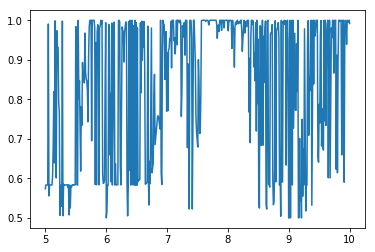

In [188]:
import matplotlib.pyplot as plt
plt.plot(K,f)

In [ ]:
k=8.1
hhh = np.zeros((100,100,100))
T = np.linspace(0,0.5,100) 
for i,I in enumerate(T):
    for j,J in enumerate(np.linspace(0,i,100)):
        for k,K in enumerate(np.linspace(0,j,100)):
            fun = lambda x: dis(z,x)[0]+ dis(z,x)[1] + abs(np.pi/4-dis(z,x)[2])*k
            x0 = [K,J,I]
            res = minimize(fun, x0, tol = 1e-7)
            hhh[i][j][k] = dis(z,res.x)[3]